In [ ]:
#dataset link
#https://www.kaggle.com/datasets/vetrirah/customer?select=Train.csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [3]:
data=pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Remove records that do not have a customer ID.
data= data[pd.notnull(data['CustomerID'])]

In [6]:
#Create a new column for the total sales amount for each invoice in the data frame.
data['Sales'] = data['Quantity'] * data['UnitPrice']
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [7]:
#summarize sales amounts by CustomerID
df= data.groupby('CustomerID').agg({'Sales': sum, 
                               'InvoiceNo': lambda x: x.nunique()})
df.columns = ['TotalSales', 'OrderCount'] 
df.head(5)

,TotalSales,OrderCount
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [8]:
df['AvgOrderValue'] = df['TotalSales'] / df['OrderCount']
df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [9]:
rank_df = df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,-1.698182,-0.691236,-1.698182
12347.0,1.479522,1.026356,1.431195
12348.0,0.956639,0.344231,1.149155
12349.0,0.934456,-1.731457,1.702143
12350.0,-0.704704,-1.730664,0.669845


In [10]:
X = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].values
X.shape

(4372, 3)

In [11]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

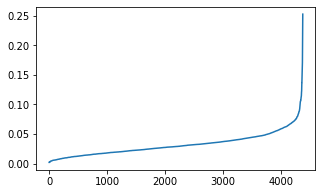

In [12]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [67]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.15, min_samples=7)
clustering.fit(X)

DBSCAN(eps=0.15, min_samples=7)

In [68]:
clusters = clustering.labels_
print(clusters)
print(np.unique(clusters) )
print(len(set(clusters)))

[0 1 1 ... 1 1 1]
[-1  0  1  2  3  4  5]
7


In [60]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clusters)

-0.025863590722393453

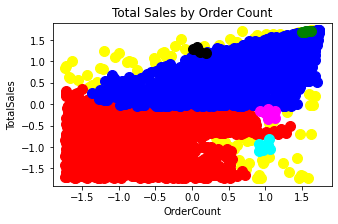

In [48]:
plt.scatter(X[clusters == -1, 0], X[clusters == -1, 1], s = 100, c = 'yellow', label = 'Cluster 7')
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
plt.scatter(X[clusters == 5, 0], X[clusters == 5, 1], s = 100, c = 'black', label = 'Cluster 6')  

# plot title addition
plt.title('Total Sales by Order Count')
# labelling the x-axis
plt.xlabel('OrderCount')
# label of the y-axis
plt.ylabel('TotalSales')

# show the plot
plt.show()

In [44]:
# fig = plt.figure(figsize = (9,6))
# plt.scatter(
#     clusters.iloc[clusters['Cluster'] == 0]['OrderCount'], 
#     clusters[clusters['Cluster'] == 0]['TotalSales'],
#     c='blue')

# plt.scatter(
#     clusters[clusters['Cluster'] == 1]['OrderCount'], 
#     clusters[clusters['Cluster'] == 1]['TotalSales'],
#     c='orange')

# plt.scatter(
#     clusters[clusters['Cluster'] == 2]['OrderCount'], 
#     clusters[clusters['Cluster'] == 2]['TotalSales'],
#     c='green')

# plt.scatter(
#     clusters[clusters['Cluster'] == 3]['OrderCount'], 
#     clusters[clusters['Cluster'] == 3]['TotalSales'],
#     c='red')

# plt.scatter(
#     clusters[clusters['Cluster'] == 4]['OrderCount'], 
#     clusters[clusters['Cluster'] == 4]['TotalSales'],
#     c='yellow')

# plt.scatter(
#     clusters[clusters['Cluster'] == 5]['OrderCount'], 
#     clusters[clusters['Cluster'] == 5]['TotalSales'],
#     c='black')

# plt.scatter(
#     clusters[clusters['Cluster'] == 6]['OrderCount'], 
#     clusters[clusters['Cluster'] == 6]['TotalSales'],
#     c='pink')

# plt.title('Total Sales by Order Count', size=14)
# plt.xlabel('Order Count', size=12)
# plt.ylabel('Total Sales', size=12)

# plt.grid()
# plt.show()

AttributeError: ignored

<Figure size 648x432 with 0 Axes>

Sakshi

In [ ]:
df = pd.read_csv('Customer_Segmentation.csv')
df.head()
df.shape

(8068, 11)

In [ ]:
df.drop(['Var_1', 'Segmentation'], axis=1,inplace=True)
print("Dataset shape:", df.shape)
df.dropna(inplace=True)

Dataset shape: (8068, 9)


In [ ]:
df['Spending_Score'].replace(['Low', 'Average','High'],[1, 2, 3], inplace=True)


In [ ]:
df = df.astype({'Family_Size':'int'})

In [ ]:
df = df.astype({'Work_Experience':'int'})

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1,1,4
2,466315,Female,Yes,67,Yes,Engineer,1,1,1
3,461735,Male,Yes,67,Yes,Lawyer,0,3,2
5,461319,Male,Yes,56,No,Artist,0,2,2
6,460156,Male,No,32,Yes,Healthcare,1,1,3


In [ ]:
x = df[['Age','Work_Experience','Spending_Score','Family_Size']]
x.shape

(6718, 4)

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

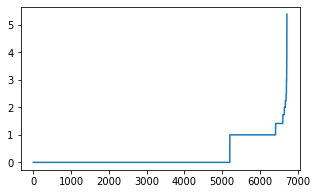

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot


In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=500, min_samples=2).fit(x)
DBSCAN_dataset = x.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

DBSCAN_dataset.Cluster.value_counts().to_frame()


,Cluster
0,6718


In [ ]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Age") # X-axis label
plt.ylabel("Spending_Score") # Y-axis label
plt.show() # showing the plot

InvalidIndexError: ignored